<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/7%EC%9E%A5.%20%EC%95%99%EC%83%81%EB%B8%94%20%ED%95%99%EC%8A%B5%EA%B3%BC%20%EB%9E%9C%EB%8D%A4%20%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8/5.%20%EB%B6%80%EC%8A%A4%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 부스팅(Boosting)
부스팅은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법을 말한다.<br/>
부스팅 방법의 아이디어는 앞의 모델을 보완해 나가면서 일련의 예측기를 학습시키는 것이다.

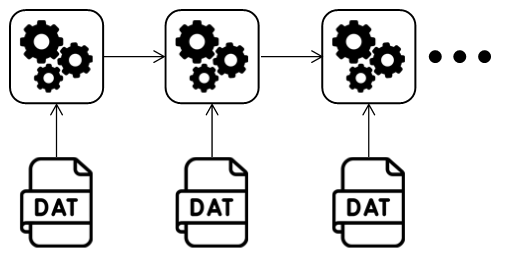

### AdaBoost(Adaptive boosting)
(에이다 부스트)이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 방식.

In [ ]:
'''
AdaBoost의 특성상 단점.
각 예측기는 이전 예측기가 훈련되고 평가된 후에 학습될 수 있기 때문에 훈련을 병렬화할 수 없다.
'''

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,
    learning_rate=0.5,
    random_state=42
)

In [ ]:
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.88

### 그레디언트 부스팅(Gradient Boosting)
AdaBoost와 마찬가지로 이전까지의 오차를 보정하도록 예측기를 순차적으로 예측함.<br/>
다만, 샘플의 가중치를 수정하는 것이 아닌 잔여 오차(residual error)에 새로운 예측기를 학습시킴.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # y = 3x^2 + 가우스_잡음
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [2]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [3]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [4]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in [tree_reg1, tree_reg2, tree_reg3])

array([0.49484029, 0.04021166, 0.75026781])

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [12]:
gbrt.predict(X_new)

array([0.49484029, 0.04021166, 0.75026781])

In [13]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500,
                                 learning_rate=0.05, n_iter_no_change=10, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [14]:
gbrt.n_estimators_

92